## <center>CEMENT SECTOR ANALYSIS</center> 

### NAME: ABHIRAM KULKARNI

#### Importing necessary packages for analysis 

In [67]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Importing dataset for Ambuja, Acc, Ultratech, Shreecem, Dalmia bharat from Alpha vantage API

In [ ]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data["Time Series (Daily)"]).T
df.columns = ["Open", "High", "Low", "Close", "Volume"]
df.index = pd.to_datetime(df.index)
df = df.astype(float)

In [12]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ULTRACEMCO.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data1 = r.json()
df1 = pd.DataFrame(data1["Time Series (Daily)"]).T
df1.columns = ["Open", "High", "Low", "Close", "Volume"]
df1.index = pd.to_datetime(df1.index)
df1 = df1.astype(float)

In [18]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ACC.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data2 = r.json()
df2 = pd.DataFrame(data2["Time Series (Daily)"]).T
df2.columns = ["Open", "High", "Low", "Close", "Volume"]
df2.index = pd.to_datetime(df2.index)
df2 = df2.astype(float)

In [21]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=JKCEMENT.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data3 = r.json()
df3 = pd.DataFrame(data3["Time Series (Daily)"]).T
df3.columns = ["Open", "High", "Low", "Close", "Volume"]
df3.index = pd.to_datetime(df3.index)
df3 = df3.astype(float)

In [23]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SHREECEM.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data4 = r.json()
df4 = pd.DataFrame(data4["Time Series (Daily)"]).T
df4.columns = ["Open", "High", "Low", "Close", "Volume"]
df4.index = pd.to_datetime(df4.index)
df4 = df4.astype(float)

#### Preprocessing the data suitable for analysis

In [61]:
#taking last 6 months data for analysis 
cutoff_date = datetime.now() - pd.DateOffset(months=6)

# Filtering each DataFrame to include only the last 6 months data
df = df[df.index >= cutoff_date]
df1 = df1[df1.index >= cutoff_date]
df2 = df2[df2.index >= cutoff_date]
df3 = df3[df3.index >= cutoff_date]
df4 = df4[df4.index >= cutoff_date]

# Combining filtered data into a single DataFrame 
all_dfs = [df,df1,df2, df3, df4]
combined_data = pd.concat(all_dfs, keys=["Ambuja cement","UltraTech Cement","Acc","JK Cement", "Shree Cement"], names=["Company", "Date"])


In [62]:
combined_data

Open      High       Low     Close    Volume
Company       Date                                                        
Ambuja cement 2025-01-10    524.75    524.75    508.55    511.10  108221.0
              2025-01-09    539.65    539.65    522.35    525.30   32467.0
              2025-01-08    536.25    540.35    530.15    537.65   54829.0
              2025-01-07    530.00    539.45    524.70    535.75   64928.0
              2025-01-06    548.35    548.35    526.40    530.00   51712.0
...                            ...       ...       ...       ...       ...
Shree Cement  2024-10-18  24196.05  24381.00  24077.15  24340.00     228.0
              2024-10-17  24446.05  24492.55  24046.60  24258.55     609.0
              2024-10-16  24730.00  24730.00  24291.00  24445.10     484.0
              2024-10-15  24649.90  24941.45  24646.30  24710.90     447.0
              2024-10-14  24508.30  24630.65  24141.40  24593.15     304.0

[308 rows x 5 columns]

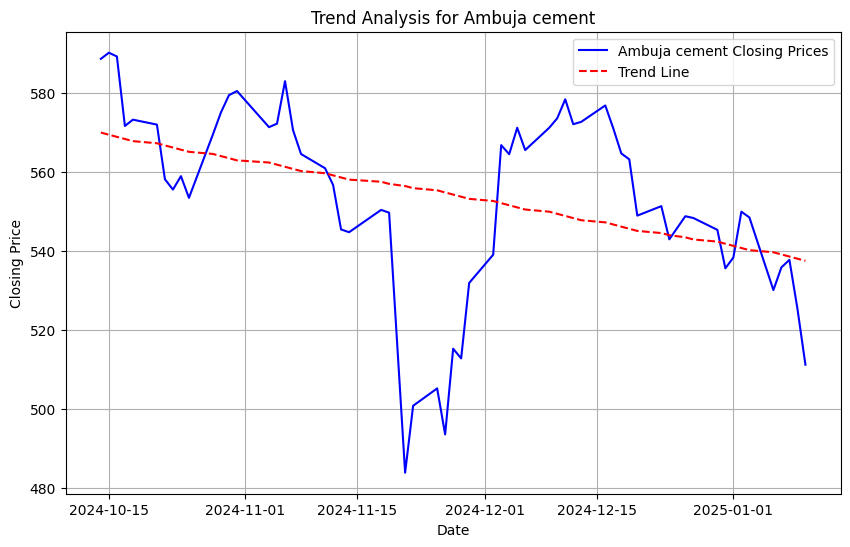

Ambuja cement: Slope = -0.54126


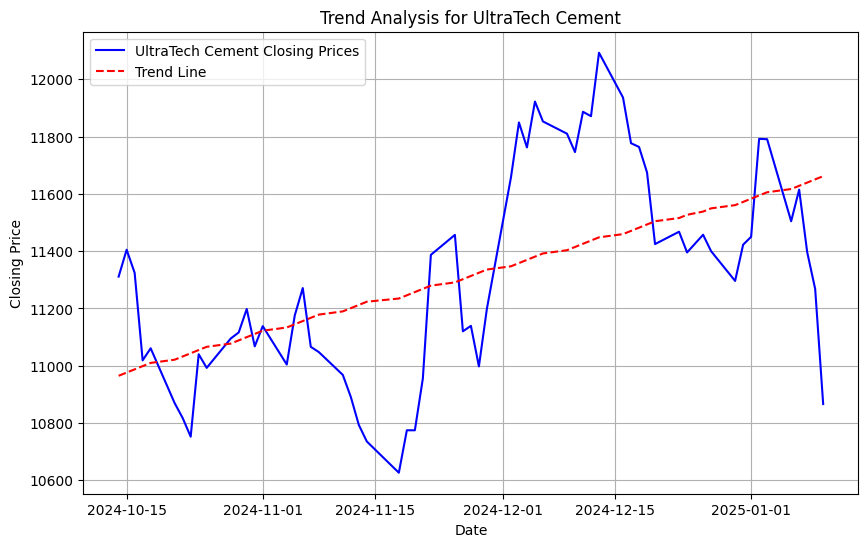

UltraTech Cement: Slope = 11.24272


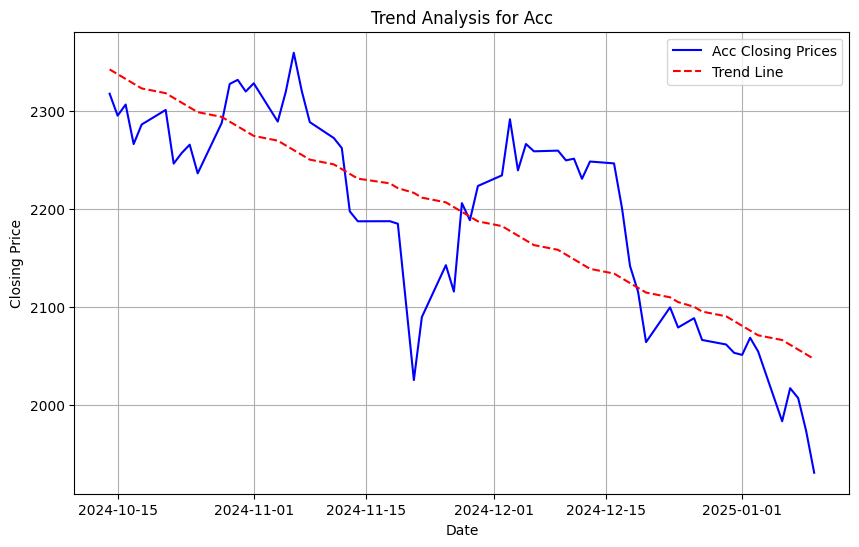

Acc: Slope = -4.83700


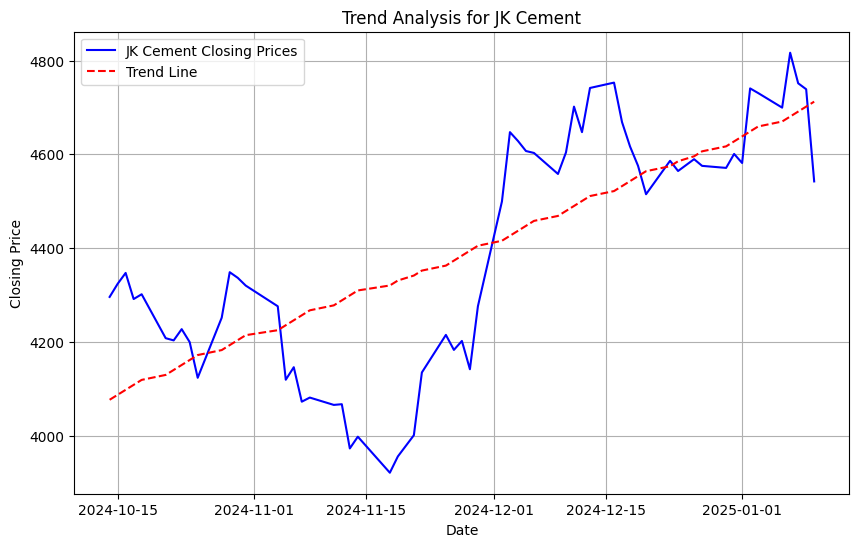

JK Cement: Slope = 10.58808


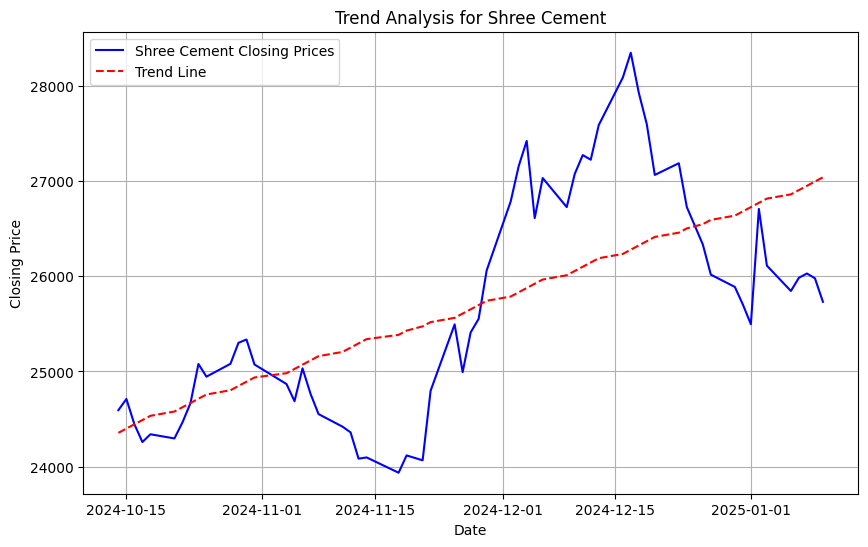

Shree Cement: Slope = 44.70595
Individual Company Trends:
Ambuja cement: Downward trend (Slope = -0.54126)
UltraTech Cement: Upward trend (Slope = 11.24272)
Acc: Downward trend (Slope = -4.83700)
JK Cement: Upward trend (Slope = 10.58808)
Shree Cement: Upward trend (Slope = 44.70595)


In [ ]:

# Function to perform trend analysis[Linear Regression analysis] for individual companies
def individual_trend_analysis(data):
    slopes = {}
    companies = data.index.get_level_values('Company').unique()  

    for company in companies:
        company_data = data.xs(company, level='Company').copy()
        
        # Ensuring data is sorted in ascending order by date
        company_data = company_data.sort_index()
        
        # Add numeric index for regression
        company_data['DateIndex'] = np.arange(len(company_data))
        X = company_data['DateIndex'].values.reshape(-1, 1)  # Independent variable
        y = company_data['Close'].values.reshape(-1, 1)  # Dependent variable
        
        # Linear Regression
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0][0]  # Extracting the slope
        
        # Add trendline to the DataFrame
        company_data['TrendLine'] = model.predict(X)
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(company_data.index, company_data['Close'], label=f"{company} Closing Prices", color='blue')
        plt.plot(company_data.index, company_data['TrendLine'], label="Trend Line", color='red', linestyle='--')
        plt.title(f"Trend Analysis for {company}")
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.legend()
        plt.grid()
        plt.show()
        
        slopes[company] = slope
        print(f"{company}: Slope = {slope:.5f}")
    
    return slopes

# Performing the analysis
slopes = individual_trend_analysis(combined_data)

# Displaying results
print("Individual Company Trends:")
for company, slope in slopes.items():
    trend = "Downward" if slope < 0 else "Upward"
    print(f"{company}: {trend} trend (Slope = {slope:.5f})")




#### Analysing Sector-wide trend

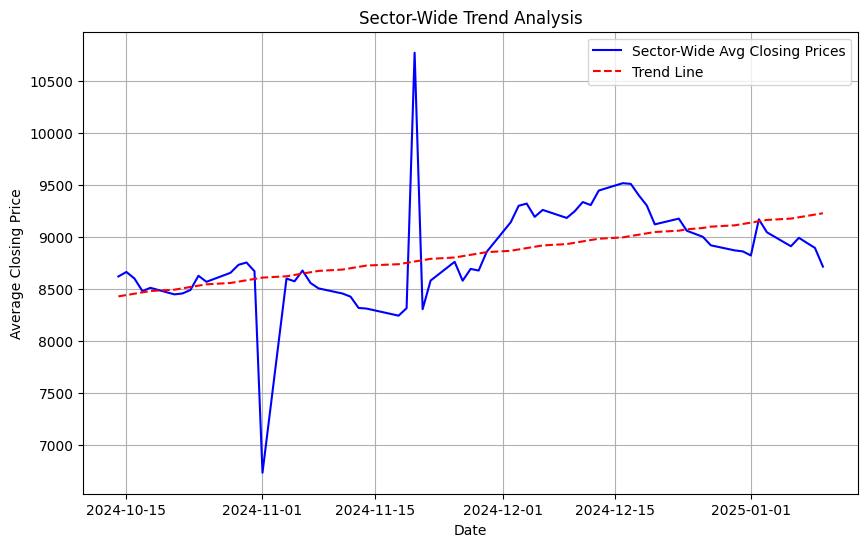

Sector-Wide Trend: Upward trend (Slope = 12.90566)


In [68]:
# Calculate sector-wide average closing price
sector_avg = combined_data.groupby('Date')['Close'].mean()

# Preparing data for regression
sector_avg_df = sector_avg.reset_index()
sector_avg_df['DateIndex'] = np.arange(len(sector_avg_df))  
X_sector = sector_avg_df['DateIndex'].values.reshape(-1, 1)
y_sector = sector_avg_df['Close'].values.reshape(-1, 1)

# Linear Regression
sector_model = LinearRegression()
sector_model.fit(X_sector, y_sector)
sector_slope = sector_model.coef_[0][0]

# Adding trendline to the DataFrame
sector_avg_df['TrendLine'] = sector_model.predict(X_sector)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sector_avg_df['Date'], sector_avg_df['Close'], label="Sector-Wide Avg Closing Prices", color='blue')
plt.plot(sector_avg_df['Date'], sector_avg_df['TrendLine'], label="Trend Line", color='red', linestyle='--')
plt.title("Sector-Wide Trend Analysis")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.legend()
plt.grid()
plt.show()

# Displaying sector trend
sector_trend = "Downward" if sector_slope < 0 else "Upward"
print(f"Sector-Wide Trend: {sector_trend} trend (Slope = {sector_slope:.5f})")
